# <center>Diabetes Prediction Model Using Logical Regression<center>
![diabetes](https://badgut.org/wp-content/uploads/Image-Content-diabeties-gut.png)

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.
    
## About data:-
    1) 


In [42]:
# import necessary modules  
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [43]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
%matplotlib inline
from sklearn.metrics import accuracy_score

In [44]:
df=pd.read_csv("diabetes.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


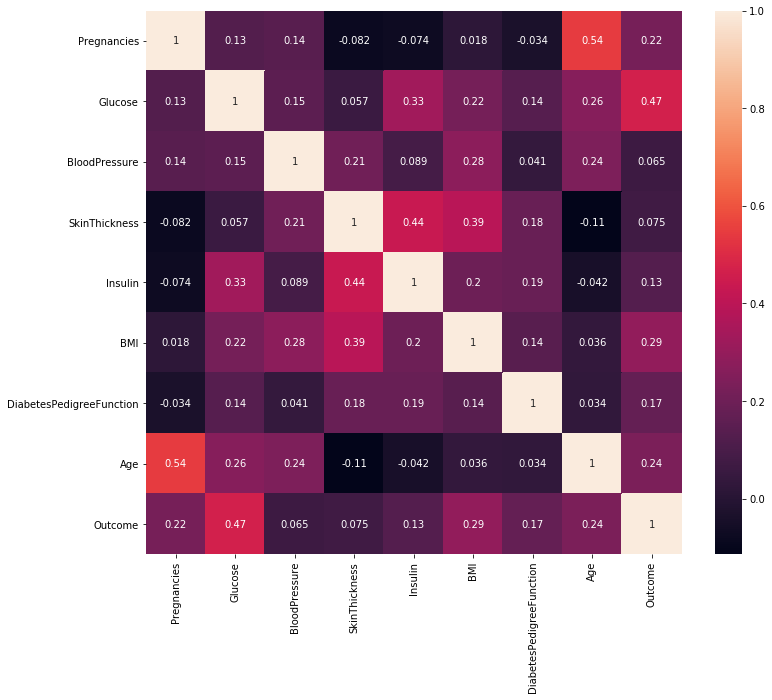

In [55]:
corr_1 = df.corr()
corr_f = corr_1.index
plt.figure(figsize=(12,10))
#plot heat map
sns.heatmap(df[corr_f].corr(),annot=True)
plt.show()

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
inp_df=df.drop(df.columns[[8]],axis=1)  
out_df=df.drop(df.columns[[0,1,2,3,4,5,6,7]],axis=1)

In [10]:
inp_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
out_df.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [12]:
scaler=StandardScaler() #algorithm to fit inp_df (a part of sklear preprocessing)
inp_df=scaler.fit_transform(inp_df)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
X_train,X_test,y_train,y_test=train_test_split(inp_df,out_df,test_size=0.2,random_state=42)

In [15]:
X_tr_arr= X_train
X_ts_arr= X_test
y_tr_arr= y_train.values #matrix is not valid in update version of python
y_ts_arr= y_test.values

In [16]:
print('Input Shape=',X_tr_arr.shape)
print('output Shape=',X_ts_arr.shape)

Input Shape= (614, 8)
output Shape= (154, 8)


In [17]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [18]:
#Get number of features
n_feature=X_tr_arr.shape[1]
print("Number of Features",n_feature)
w,b= weightInitialization(n_feature)

Number of Features 8


In [19]:
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)

#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)

Optimized weights [[0.04090975 0.0901197  0.0121618  0.01034962 0.01862823 0.05922672
  0.03080363 0.05487083]]
Optimized intercept -0.06501211742531268


In [20]:
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)

In [21]:
m_tr=X_tr_arr.shape[0]
m_ts=X_ts_arr.shape[0]

In [22]:
y_tr_pred = predict(final_train_pred, m_tr)
acc_tr=accuracy_score(y_tr_pred.T, y_tr_arr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))

Training Accuracy 0.754071661237785


In [23]:
y_ts_pred = predict(final_test_pred, m_ts)
acc_ts=accuracy_score(y_ts_pred.T, y_ts_arr)
print('Test Accuracy',acc_ts)

Test Accuracy 0.7077922077922078


In [24]:
print({"Train Accuracy":acc_tr,"Test Accuracy":acc_ts})

{'Train Accuracy': 0.754071661237785, 'Test Accuracy': 0.7077922077922078}


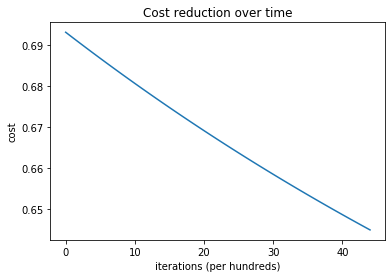

In [25]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

# Results-
1) Training Accuracy- 75.4% \
2) Test Accuracy- 70% \
3) Blood Glucose level and BMI was the major Reasons for Diabetes (from Correaltion Heatmap)